In [ ]:
%matplotlib inline
!pip install geopandas
import pandas as pd
import geopandas

In [2]:
import pandas as pd

In [ ]:
!pip install contextily
import contextily as ctx

# 1. una mappa dell'Italia con le province colorate in base al numero di centri vaccinali Covid

In [10]:
provincie = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g/ProvCM01012021_g_WGS84.dbf')
provincie

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,299029.117691,2.262164e+09,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,126272.490811,4.055793e+08,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,198635.321418,8.619365e+08,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,237762.889058,1.542032e+09,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


In [9]:
CentriVaccinali = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/punti-somministrazione-latest.csv')
CentriVaccinali

,area,provincia,comune,presidio_ospedaliero,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,ITF,ITF1,13,Abruzzo
1,ABR,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,ITF,ITF1,13,Abruzzo
2,ABR,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,ITF,ITF1,13,Abruzzo
3,ABR,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,ITF,ITF1,13,Abruzzo
4,ABR,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
288,VEN,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",ITH,ITH3,5,Veneto
289,VEN,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,ITH,ITH3,5,Veneto
290,VEN,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,ITH,ITH3,5,Veneto
291,VEN,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,ITH,ITH3,5,Veneto


In [33]:
provincie['DEN_UTS'] = provincie['DEN_UTS'].str.upper() #

In [42]:
Prov_Centri = pd.merge(provincie,CentriVaccinali,how='inner',left_on='DEN_UTS',right_on='provincia')
Prov_Centri

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry,area,provincia,comune,presidio_ospedaliero,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",PIE,TORINO,CHIVASSO,ASL TO 4 OSPEDALE CHIVASSO,ITC,ITC1,1,Piemonte
1,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",PIE,TORINO,CIRIE’,ASL TO 4 OSPEDALE CIRIE’,ITC,ITC1,1,Piemonte
2,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",PIE,TORINO,IVREA,ASL TO 4 OSPEDALE IVREA,ITC,ITC1,1,Piemonte
3,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",PIE,TORINO,MONCALIERI,ASL TO 5 OSPEDALE MONCALIERI,ITC,ITC1,1,Piemonte
4,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",PIE,TORINO,ORBASSANO,AOU SAN LUIGI GONZAGA ORBASSANO,ITC,ITC1,1,Piemonte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2,8,99,0,99,Rimini,-,RIMINI,RN,Provincia,254852.128781,8.658220e+08,"POLYGON ((779573.576 4891555.437, 780189.685 4...",EMR,RIMINI,RIMINI,OSPEDALE RIMINI,ITH,ITH5,8,Emilia-Romagna
247,3,9,100,0,100,Prato,-,PRATO,PO,Provincia,119039.644116,3.658260e+08,"POLYGON ((673895.993 4886075.201, 673938.993 4...",TOS,PRATO,PRATO,OSPEDALE SANTO STEFANO,ITI,ITI1,9,Toscana
248,4,18,101,0,101,Crotone,-,CROTONE,KR,Provincia,255379.678840,1.734212e+09,"POLYGON ((1193301.060 4396651.846, 1193357.426...",CAL,CROTONE,CROTONE,OSPEDALE SPOKE CROTONE,ITF,ITF6,18,Calabria
249,4,18,102,0,102,Vibo Valentia,-,VIBO VALENTIA,VV,Provincia,202524.198570,1.148196e+09,"POLYGON ((1133745.148 4322320.462, 1134354.272...",CAL,VIBO VALENTIA,VIBO VALENTIA,OSPEDALE SPOKE VIBO VALENTIA,ITF,ITF6,18,Calabria


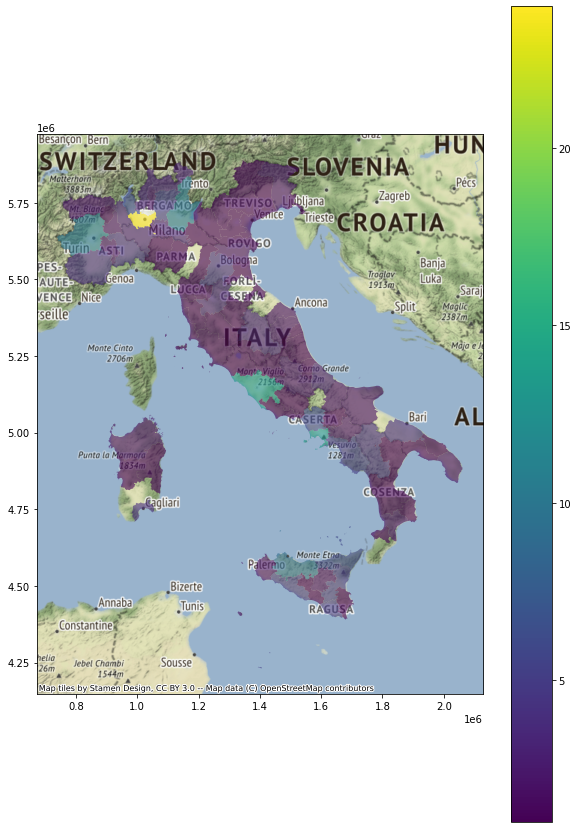

In [50]:
numero_presidi = CentriVaccinali.groupby("provincia", as_index = False)[["presidio_ospedaliero"]].count()
vaccini_province = pd.merge(provincie, numero_presidi, how = "outer", left_on = "DEN_UTS", right_on = "provincia")

ax = vaccini_province.to_crs(epsg=3857).plot(figsize = (10,15), column = "presidio_ospedaliero",  legend = True, alpha = 0.6)
ctx.add_basemap(ax)

#2. una mappa dell'Italia con le regioni colorate in base alla percentuale di guariti dal Covid rispetto la popolazione

In [79]:
guariti = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/soggetti-guariti.csv")
popolazione = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv")
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g")


In [80]:
guariti

,area,nome_area,fascia_anagrafica,totale_guariti
0,ABR,Abruzzo,05-11,11532
1,ABR,Abruzzo,12-19,4279
2,ABR,Abruzzo,20-29,2473
3,ABR,Abruzzo,30-39,3469
4,ABR,Abruzzo,40-49,4367
...,...,...,...,...
184,VEN,Veneto,40-49,38700
185,VEN,Veneto,50-59,38094
186,VEN,Veneto,60-69,14472
187,VEN,Veneto,70-79,4939


In [57]:
popolazione

,nome_area,totale_popolazione
0,Abruzzo,1265353
1,Basilicata,524588
2,Calabria,1803821
3,Campania,5484138
4,Emilia-Romagna,4298305
5,Friuli-Venezia Giulia,1162352
6,Lazio,5528280
7,Liguria,1479768
8,Lombardia,9898997
9,Marche,1456240


In [58]:
regioni

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
3,2,4,Trentino-Alto Adige,8.008937e+05,1.360755e+10,"POLYGON ((743267.749 5219765.793, 743387.812 5..."
4,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5..."
5,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
6,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
8,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563..."
9,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910..."


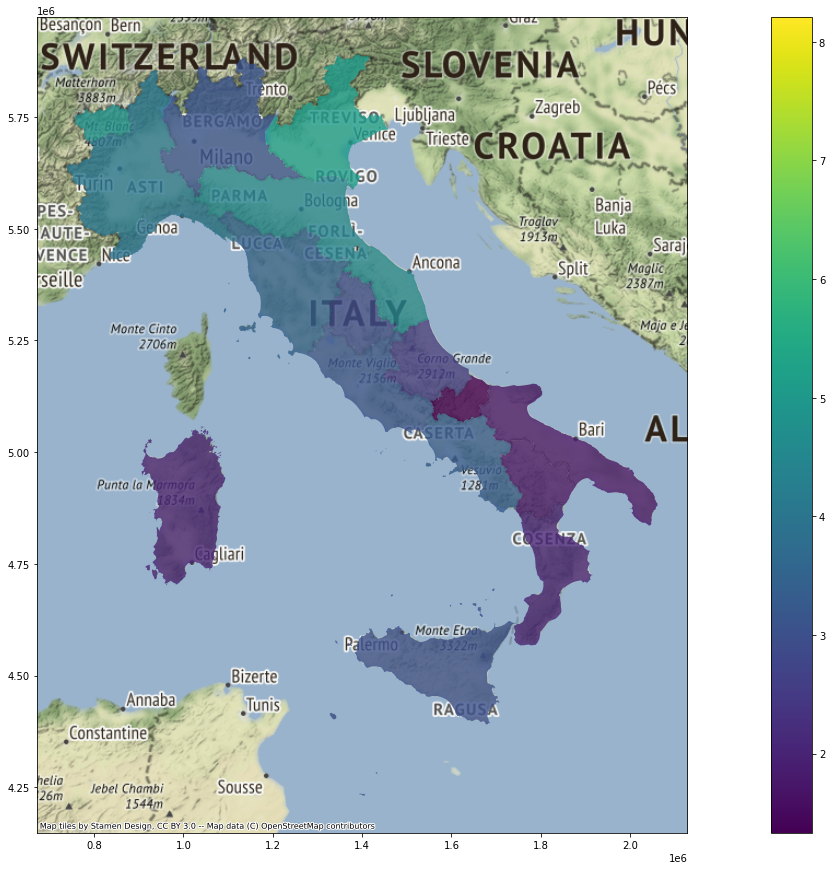

In [75]:
guariti = guariti.groupby("nome_area", as_index = False)[["totale_guariti"]].sum() #per ogni area il numero di guariti
popolazione = popolazione.groupby("nome_area", as_index = False)[["totale_popolazione"]].sum() #per ogni area il numero della popolazione guarita
pop_guariti = pd.merge(popolazione, guariti, how = "outer", on = "nome_area") #merge sulla popolazione e sui guariti in base al nome_area
pop_guariti["percentuale_guariti"] = (pop_guariti["totale_guariti"] / pop_guariti["totale_popolazione"]) * 100 #creazione di una colonna con la percentuale di guariti ripetto alla popolazione
regioni_percentuale = pd.merge(regioni, pop_guariti, how = "outer", left_on = "DEN_REG", right_on = "nome_area") #merge sulle regioni e sulla percentuale in base al nome_area

ax = regioni_percentuale.to_crs(epsg=3857).plot(figsize = (30,15), column = "percentuale_guariti",  legend = True, alpha = 0.8)
ctx.add_basemap(ax)

# 3. una mappa dell'Italia con le regioni colorate in rosso se la percentuale di vaccinati (prima vaccinazione) è inferiore alla media e in verde se l apercentuale di vaccinati è superiore alla media

In [64]:
vaccini = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv")


In [82]:
guariti2 = guariti.groupby(["area","nome_area"])["totale_guariti"].sum().reset_index() #raggruppamento in base alla colonna area,nome_area conntando il totale_guariti 
guariti2

,area,nome_area,totale_guariti
0,ABR,Abruzzo,32274
1,BAS,Basilicata,9446
2,CAL,Calabria,37021
3,CAM,Campania,180294
4,EMR,Emilia-Romagna,189744
5,FVG,Friuli-Venezia Giulia,64525
6,LAZ,Lazio,172892
7,LIG,Liguria,57952
8,LOM,Lombardia,306057
9,MAR,Marche,64393


In [83]:
popolazione2 = popolazione.groupby("nome_area")["totale_popolazione"].sum().reset_index() #raggruppamento in base al nome_area sommando il numero della popolazione
popolazione2

,nome_area,totale_popolazione
0,Abruzzo,1265353
1,Basilicata,524588
2,Calabria,1803821
3,Campania,5484138
4,Emilia-Romagna,4298305
5,Friuli-Venezia Giulia,1162352
6,Lazio,5528280
7,Liguria,1479768
8,Lombardia,9898997
9,Marche,1456240


In [85]:
primaDose = vaccini.groupby("nome_area")["prima_dose"].sum().reset_index() #raggruppamento per ogni area la somma della prima dose
primaDose

,nome_area,prima_dose
0,Abruzzo,1046348
1,Basilicata,453935
2,Calabria,1510718
3,Campania,4528492
4,Emilia-Romagna,3647682
5,Friuli-Venezia Giulia,961656
6,Lazio,4832987
7,Liguria,1252625
8,Lombardia,8398142
9,Marche,1187118


In [86]:
df_reg_prima = pd.merge(regioni,primaDose,how="inner",left_on="DEN_REG",right_on="nome_area") #merge sulle regioni e sulle prime dosi in base alle colonne:DEN_REG e nome_area
df_tot = pd.merge(df_reg_prima,popolazione2,how="inner",on="nome_area") #merge su df_reg_prima e sulla popolazione2
df_tot

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose,totale_popolazione
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,3461784,4175308
1,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,8398142,9898997
2,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,3877602,4684141
3,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,1252625,1479768
4,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,3647682,4298305
5,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,3123148,3579722
6,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,717740,839373
7,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,1187118,1456240
8,3,12,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769...",Lazio,4832987,5528280
9,4,13,Abruzzo,6.153465e+05,1.082885e+10,"MULTIPOLYGON (((930273.425 4714737.743, 930147...",Abruzzo,1046348,1265353


In [87]:
df_tot["percentuale"] = df_tot["prima_dose"] / df_tot["totale_popolazione"] * 100 #creazione di una colonna con la percentuale delle prime dosi ripetto alla popolazione
df_tot

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose,totale_popolazione,percentuale
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,3461784,4175308,82.910865
1,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,8398142,9898997,84.838312
2,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,3877602,4684141,82.781496
3,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,1252625,1479768,84.650094
4,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,3647682,4298305,84.863266
5,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,3123148,3579722,87.245546
6,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,717740,839373,85.509065
7,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,1187118,1456240,81.519392
8,3,12,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769...",Lazio,4832987,5528280,87.422978
9,4,13,Abruzzo,6.153465e+05,1.082885e+10,"MULTIPOLYGON (((930273.425 4714737.743, 930147...",Abruzzo,1046348,1265353,82.692182


In [88]:
df_tot.percentuale.mean() #calcolo della sulla percentuale


84.64479574343098

In [89]:
regMin = df_tot[df_tot.percentuale < df_tot.percentuale.mean()] #rilevamento delle regioni con la percentuale di vaccinati minore della media
regMin

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose,totale_popolazione,percentuale
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,3461784,4175308,82.910865
2,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,3877602,4684141,82.781496
7,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,1187118,1456240,81.519392
9,4,13,Abruzzo,6.153465e+05,1.082885e+10,"MULTIPOLYGON (((930273.425 4714737.743, 930147...",Abruzzo,1046348,1265353,82.692182
11,4,15,Campania,8.881667e+05,1.366325e+10,"MULTIPOLYGON (((1037313.692 4449410.367, 10373...",Campania,4528492,5484138,82.574363
14,4,18,Calabria,8.378109e+05,1.521607e+10,"MULTIPOLYGON (((1083358.846 4416348.741, 10833...",Calabria,1510718,1803821,83.750993
15,5,19,Sicilia,1.334638e+06,2.582376e+10,"MULTIPOLYGON (((822886.611 3935355.889, 822871...",Sicilia,3834663,4665412,82.193448


In [90]:
regSup = df_tot[df_tot.percentuale > df_tot.percentuale.mean()] #rilevamento delle regioni con la percentuale di vaccinati maggiore della media
regSup

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose,totale_popolazione,percentuale
1,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,8398142,9898997,84.838312
3,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,1252625,1479768,84.650094
4,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,3647682,4298305,84.863266
5,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,3123148,3579722,87.245546
6,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,717740,839373,85.509065
8,3,12,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769...",Lazio,4832987,5528280,87.422978
10,4,14,Molise,4.338181e+05,4.461183e+09,"POLYGON ((984002.800 4670714.415, 985067.040 4...",Molise,250950,288826,86.886222
12,4,16,Puglia,1.175757e+06,1.953616e+10,"MULTIPOLYGON (((1280636.111 4454459.746, 12806...",Puglia,3325820,3819923,87.065106
13,4,17,Basilicata,6.142055e+05,1.007274e+10,"MULTIPOLYGON (((1073707.061 4445700.106, 10737...",Basilicata,453935,524588,86.531716
16,5,20,Sardegna,1.438638e+06,2.409463e+10,"MULTIPOLYGON (((448813.650 4301762.751, 448823...",Sardegna,1341630,1568672,85.526484


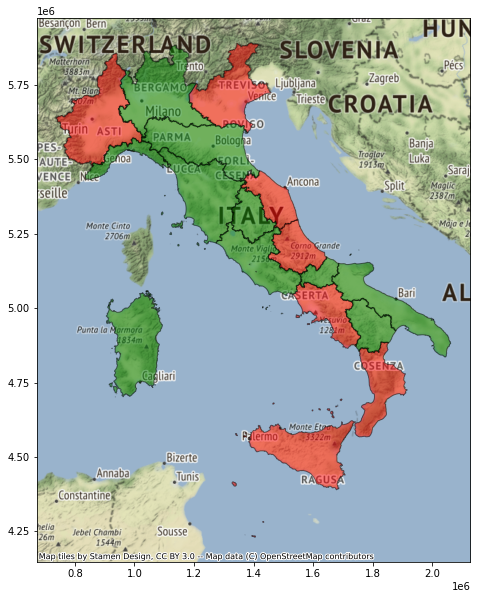

In [91]:
ax = regMin.to_crs(epsg=3857).plot(figsize=(10,10),facecolor="r",alpha=0.5,edgecolor="k")
regSup.to_crs(epsg=3857).plot(ax=ax,facecolor="g",alpha=0.5,edgecolor="k")
ctx.add_basemap(ax)
